In [ ]:
import pandas as pd
from matplotlib import font_manager, rc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 병합

In [ ]:
patient = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data science/data/PatientInfo.csv")
df_2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data science/data/위경도변환_2020.csv")
weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data science/data/Weather.csv")

In [ ]:
weather = weather[weather['date'] > '2020-01-01']

In [ ]:
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
61,41000,Chungcheongnam-do,2020-03-01,4.7,-0.1,7.6,0.0,5.7,230.0,81.5
62,41000,Chungcheongnam-do,2020-03-02,3.4,-0.1,6.8,0.0,5.7,320.0,60.8
63,41000,Chungcheongnam-do,2020-03-03,4.2,-1.0,11.2,0.0,4.8,200.0,74.0
64,41000,Chungcheongnam-do,2020-03-04,2.8,0.6,6.3,0.0,9.0,290.0,60.9
65,41000,Chungcheongnam-do,2020-03-05,1.2,-3.7,6.3,0.0,4.8,320.0,55.5
...,...,...,...,...,...,...,...,...,...,...
117,41000,Chungcheongnam-do,2020-04-26,10.7,2.8,18.3,0.0,6.4,320.0,51.3
118,41000,Chungcheongnam-do,2020-04-27,10.8,2.9,18.4,0.0,5.9,290.0,53.4
119,41000,Chungcheongnam-do,2020-04-28,11.4,2.6,18.6,0.0,5.9,180.0,68.4
120,41000,Chungcheongnam-do,2020-04-29,13.5,7.1,20.7,0.0,5.2,180.0,52.1


In [ ]:
day_2020 = df_2020[['total', 'etl_ymd']].groupby('etl_ymd').sum()

,total
etl_ymd,
20200301,1200828
20200302,1744819
20200303,1731557
20200304,1719460
20200305,1726021
...,...
20200426,1796010
20200427,2290146
20200428,2345918


In [ ]:
population = day_2020['total'].to_list()

In [ ]:
weather['population'] = population

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_df = pd.merge(weather, patient_count, how = 'outer', left_on='date', right_index=True)

In [ ]:
final_df.rename(columns={'confirmed_date': 'patient_count'}, inplace = True)

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data science/data/final_df.csv', index=False)

# 시차두기

In [ ]:
final_df

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,avg_relative_humidity,population,patient_count
0,4.7,-0.1,7.6,0.0,5.7,81.5,1200828,14.0
1,3.4,-0.1,6.8,0.0,5.7,60.8,1744819,3.0
2,4.2,-1.0,11.2,0.0,4.8,74.0,1731557,2.0
3,2.8,0.6,6.3,0.0,9.0,60.9,1719460,3.0
4,1.2,-3.7,6.3,0.0,4.8,55.5,1726021,5.0
...,...,...,...,...,...,...,...,...
56,10.7,2.8,18.3,0.0,6.4,51.3,1796010,NaN
57,10.8,2.9,18.4,0.0,5.9,53.4,2290146,NaN
58,11.4,2.6,18.6,0.0,5.9,68.4,2345918,1.0
59,13.5,7.1,20.7,0.0,5.2,52.1,2533603,NaN


In [ ]:
avg_relative_humidity1 = [None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9, 60.1, 60.0, 51.3, 53.4, 68.4, 52.1]
avg_relative_humidity2 = [None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9, 60.1, 60.0, 51.3, 53.4, 68.4]
avg_relative_humidity3 = [None, None, None,  81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9, 60.1, 60.0, 51.3, 53.4]
avg_relative_humidity4 = [None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9, 60.1, 60.0, 51.3]
avg_relative_humidity5 = [None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9, 60.1, 60.0]
avg_relative_humidity6 = [None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9, 60.1]
avg_relative_humidity7 = [None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6, 47.9]
avg_relative_humidity8 = [None, None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9, 42.6]
avg_relative_humidity9 = [None, None, None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6, 52.9]
avg_relative_humidity10 = [None, None, None, None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6, 80.6]
avg_relative_humidity11 = [None, None, None, None, None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0, 86.6]
avg_relative_humidity12 = [None, None, None, None, None, None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5, 74.0]
avg_relative_humidity13 = [None, None, None, None, None, None, None, None, None, None, None, None, None,81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4, 76.5]
avg_relative_humidity14 = [None, None, None, None, None, None, None, None, None, None, None, None, None, None, 81.5, 60.8, 74.0, 60.9, 55.5, 63.3, 60.9, 58.9, 60.1, 79.4, 49.8, 67.5, 52.1, 61.1, 56.3, 56.1, 82.1, 64.8, 61.6, 58.1, 72.5, 53.1, 59.9, 60.4, 57.3, 74.9, 66.9, 37.6, 55.4, 51.1, 50.1, 50.5, 58.6, 66.3, 49.9, 41.6, 60.1, 71.6, 48.4, 57.9, 62.3, 71.3, 67.1, 42.5, 55.3, 46.3, 47.4]


In [ ]:
max_wind_speed1 = [None, 5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9, 8.9, 8.3, 6.4, 5.9, 5.9, 5.2]
max_wind_speed2 = [None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9, 8.9, 8.3, 6.4, 5.9, 5.9]
max_wind_speed3 = [None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9, 8.9, 8.3, 6.4, 5.9]
max_wind_speed4 = [None, None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9, 8.9, 8.3, 6.4]
max_wind_speed5 = [None, None, None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9, 8.9, 8.3]
max_wind_speed6 = [None, None, None, None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9, 8.9]
max_wind_speed7 = [None, None, None, None, None, None, None, 5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2, 6.9]
max_wind_speed8 = [None, None, None, None, None, None, None, None, 5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6, 9.2]
max_wind_speed9 = [None, None, None, None, None, None, None, None, None, 5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3, 8.6]
max_wind_speed10 = [None, None, None, None, None, None, None, None, None, None, 5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8, 7.3]
max_wind_speed11 = [None, None, None, None, None, None, None, None, None, None, None, 5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8, 3.8]
max_wind_speed12 = [None, None, None, None, None, None, None, None, None, None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2, 4.8]
max_wind_speed13 = [None, None, None, None, None, None, None, None, None, None, None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5, 8.2]
max_wind_speed14 = [None, None, None, None, None, None, None, None, None, None, None, None, None, None,5.7,  5.7, 4.8, 9.0, 4.8, 3.1, 3.3, 5.2, 4.0, 8.4, 6.6, 6.1, 5.9, 7.0, 10.1, 5.7, 5.7, 5.8, 9.7, 7.5, 6.5, 7.3, 5.3, 4.5, 5.0, 3.5, 6.8, 6.1, 4.9, 4.2, 4.1, 8.9, 5.2, 6.0, 8.5, 5.5, 5.0, 4.5, 7.3, 6.0, 4.4, 4.9, 5.9, 5.9, 5.1, 4.9, 6.5]

In [ ]:
max_temp1 =  [None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2, 14.8, 17.6, 18.3, 18.4, 18.6, 20.7]
max_temp2 =  [None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2, 14.8, 17.6, 18.3, 18.4, 18.6]
max_temp3 =  [None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2, 14.8, 17.6, 18.3, 18.4]
max_temp4 =  [None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2, 14.8, 17.6, 18.3]
max_temp5 =  [None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2, 14.8, 17.6]
max_temp6 =  [None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2, 14.8]
max_temp7 =  [None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6, 14.2]
max_temp8 =  [None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2, 10.6]
max_temp9 =  [None, None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0, 11.2]
max_temp10 = [None, None, None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2, 14.0]
max_temp11 = [None, None, None, None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2, 15.2]
max_temp12 = [None, None, None, None, None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1, 18.2]
max_temp13 = [None, None, None, None, None, None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7, 17.1]
max_temp14 = [None, None, None, None, None, None, None, None, None, None, None, None, None, None, 7.6, 6.8, 11.2, 6.3, 6.3, 10.4, 12.3, 17.8, 16.6, 8.0, 8.9, 12.4, 8.3, 9.5, 9.7, 9.2, 13.1, 16.5, 11.3, 14.2, 16.8, 15.4, 16.4, 18.0, 20.1, 18.8, 13.3, 10.7, 15.5, 16.3, 18.0, 15.2, 15.1, 16.8, 12.1, 12.0, 15.9, 16.6, 14.2, 13.4, 15.4, 14.0, 16.5, 16.5, 19.1, 20.7, 22.7]

In [ ]:
min_temp1 = [None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1, 0.4, 7.0, 2.8, 2.9, 2.6, 7.1]
min_temp2 = [None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1, 0.4, 7.0, 2.8, 2.9, 2.6]
min_temp3 = [None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1, 0.4, 7.0, 2.8, 2.9]
min_temp4 = [None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1, 0.4, 7.0, 2.8]
min_temp5 = [None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1, 0.4, 7.0]
min_temp6 = [None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1, 0.4]
min_temp7 = [None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1, 4.1]
min_temp8 = [None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3, 5.1]
min_temp9 = [None, None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1, 4.3]
min_temp10 = [None, None, None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0, 6.1]
min_temp11 = [None, None, None, None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5, 7.0]
min_temp12 = [None, None, None, None, None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4, 7.5]
min_temp13 = [None, None, None, None, None, None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6, 9.4]
min_temp14 = [None, None, None, None, None, None, None, None, None, None, None, None, None, None, -0.1,  -0.1, -1.0, 0.6, -3.7, -5.5, -1.9, -2.0, 0.3, 4.0, -1.5, -2.0, 0.3, -4.6, -1.8, -3.3, 1.8, 3.1, 6.4, -0.2, 6.0, 4.0, -0.2, 0.4, 0.9, 6.4, 6.3, 1.4, -2.1, -0.7, -0.8, 6.3, 1.0, 0.9, 5.0, 0.6, -1.6, 2.5, 0.7, 0.3, 1.2, 1.2, 0.5, 4.3, 0.7, 2.3, 3.6]

In [ ]:
avg_temp1 = [None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7, 9.4, 12.7, 10.7, 10.8, 11.4, 13.5]
avg_temp2 = [None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7, 9.4, 12.7, 10.7, 10.8, 11.4]
avg_temp3 = [None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7, 9.4, 12.7, 10.7, 10.8]
avg_temp4 = [None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7, 9.4, 12.7, 10.7]
avg_temp5 = [None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7, 9.4, 12.7]
avg_temp6 = [None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7, 9.4]
avg_temp7 = [None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2, 8.7]
avg_temp8 = [None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9, 7.2]
avg_temp9 = [None, None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8, 7.9]
avg_temp10 = [None, None, None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7, 9.8]
avg_temp11 = [None, None, None, None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1, 10.7]
avg_temp12 = [None, None, None, None, None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1, 12.1]
avg_temp13 = [None, None, None, None, None, None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6, 13.1]
avg_temp14 = [None, None, None, None, None, None, None, None, None, None, None, None, None, None, 4.7, 3.4, 4.2, 2.8, 1.2, 2.3, 4.5, 6.9, 8.3, 5.9, 3.8, 5.1, 4.6, 3.9, 3.9, 3.3, 6.8, 8.8, 8.8, 8.1, 11.6, 9.6, 8.0, 8.8, 10.6, 13.4, 9.5, 6.3, 6.6, 7.2, 8.7, 9.9, 8.4, 8.4, 8.3, 6.3, 7.6, 9.1, 8.0, 7.6, 8.3, 7.0, 8.3, 10.0, 9.9, 10.9, 13.6]

In [ ]:
population_log1 = [ None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243, 2388832, 2307040, 1796010, 2290146, 2345918, 2533603]
population_log2 = [ None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243, 2388832, 2307040, 1796010, 2290146, 2345918]
population_log3 = [ None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243, 2388832, 2307040, 1796010, 2290146]
population_log4 = [ None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243, 2388832, 2307040, 1796010]
population_log5 = [ None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243, 2388832, 2307040]
population_log6 = [ None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243, 2388832]
population_log7 = [ None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217, 2242243]
population_log8 = [ None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665, 2216217]
population_log9 = [ None, None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901, 2240665]
population_log10 = [ None, None, None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450, 2181901]
population_log11 = [ None, None, None, None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804, 1711450]
population_log12 = [ None, None, None, None, None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652, 2261804]
population_log13 = [ None, None, None, None, None, None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539, 2280652]
population_log14 = [ None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1200828, 1744819, 1731557, 1719460, 1726021, 1841191, 1642107, 1367565, 1879331, 1803026, 1945947, 1948703, 2026473, 1872774, 1471291, 1980605, 1953637, 2038162, 1937101, 2162033, 2002773, 1572052, 2073501, 2085557, 2110137,2064416, 2186546, 2083967, 1716068, 2132622, 2196562, 2127653, 2100070, 2240653, 2041933, 1665365, 2115539, 2146173, 2161294, 2158016, 2339146, 2192987, 1645235, 2185331, 2302986, 2054013, 2216539]

In [ ]:
final_df

,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction,avg_relative_humidity,population,patient_count
0,4.7,-0.1,7.6,5.7,230.0,81.5,1200828,14.0
1,3.4,-0.1,6.8,5.7,320.0,60.8,1744819,3.0
2,4.2,-1.0,11.2,4.8,200.0,74.0,1731557,2.0
3,2.8,0.6,6.3,9.0,290.0,60.9,1719460,3.0
4,1.2,-3.7,6.3,4.8,320.0,55.5,1726021,5.0
...,...,...,...,...,...,...,...,...
56,10.7,2.8,18.3,6.4,320.0,51.3,1796010,NaN
57,10.8,2.9,18.4,5.9,290.0,53.4,2290146,NaN
58,11.4,2.6,18.6,5.9,180.0,68.4,2345918,1.0
59,13.5,7.1,20.7,5.2,180.0,52.1,2533603,NaN


In [ ]:
log_df = final_df
log_df['population_log1'] = population_log1
log_df['population_log2'] = population_log2
log_df['population_log3'] = population_log3
log_df['population_log4'] = population_log4
log_df['population_log5'] = population_log5
log_df['population_log6'] = population_log6
log_df['population_log7'] = population_log7
log_df['population_log8'] = population_log8
log_df['population_log9'] = population_log8
log_df['population_log10'] = population_log10
log_df['population_log11'] = population_log11
log_df['population_log12'] = population_log12
log_df['population_log13'] = population_log13
log_df['population_log14'] = population_log14

In [ ]:
log_df['avg_temp1'] = avg_temp1
log_df['avg_temp2'] = avg_temp2
log_df['avg_temp3'] = avg_temp3
log_df['avg_temp4'] = avg_temp4
log_df['avg_temp5'] = avg_temp5
log_df['avg_temp6'] = avg_temp6
log_df['avg_temp7'] = avg_temp7
log_df['avg_temp8'] = avg_temp8
log_df['avg_temp9'] = avg_temp9
log_df['avg_temp10'] = avg_temp10
log_df['avg_temp11'] = avg_temp11
log_df['avg_temp12'] = avg_temp12
log_df['avg_temp13'] = avg_temp13
log_df['avg_temp14'] = avg_temp14

In [ ]:
log_df['min_temp1'] = min_temp1
log_df['min_temp2'] = min_temp2
log_df['min_temp3'] = min_temp3
log_df['min_temp4'] = min_temp4
log_df['min_temp5'] = min_temp5
log_df['min_temp6'] = min_temp6
log_df['min_temp7'] = min_temp7
log_df['min_temp8'] = min_temp8
log_df['min_temp9'] = min_temp9
log_df['min_temp10'] = min_temp10
log_df['min_temp11'] = min_temp11
log_df['min_temp12'] = min_temp12
log_df['min_temp13'] = min_temp13
log_df['min_temp14'] = min_temp14

In [ ]:
log_df['max_temp1'] = max_temp1
log_df['max_temp2'] = max_temp2
log_df['max_temp3'] = max_temp3
log_df['max_temp4'] = max_temp4
log_df['max_temp5'] = max_temp5
log_df['max_temp6'] = max_temp6
log_df['max_temp7'] = max_temp7
log_df['max_temp8'] = max_temp8
log_df['max_temp9'] = max_temp9
log_df['max_temp10'] = max_temp10
log_df['max_temp11'] = max_temp11
log_df['max_temp12'] = max_temp12
log_df['max_temp13'] = max_temp13
log_df['max_temp14'] = max_temp14

In [ ]:
log_df['max_wind_speed1'] = max_wind_speed1
log_df['max_wind_speed2'] = max_wind_speed2
log_df['max_wind_speed3'] = max_wind_speed3
log_df['max_wind_speed4'] = max_wind_speed4
log_df['max_wind_speed5'] = max_wind_speed5
log_df['max_wind_speed6'] = max_wind_speed6
log_df['max_wind_speed7'] = max_wind_speed7
log_df['max_wind_speed8'] = max_wind_speed8
log_df['max_wind_speed9'] = max_wind_speed9
log_df['max_wind_speed10'] = max_wind_speed10
log_df['max_wind_speed11'] = max_wind_speed11
log_df['max_wind_speed12'] = max_wind_speed12
log_df['max_wind_speed13'] = max_wind_speed13
log_df['max_wind_speed14'] = max_wind_speed14

In [ ]:
log_df['avg_relative_humidity1'] = avg_relative_humidity1
log_df['avg_relative_humidity2'] = avg_relative_humidity2
log_df['avg_relative_humidity3'] = avg_relative_humidity3
log_df['avg_relative_humidity4'] = avg_relative_humidity4
log_df['avg_relative_humidity5'] = avg_relative_humidity5
log_df['avg_relative_humidity6'] = avg_relative_humidity6
log_df['avg_relative_humidity7'] = avg_relative_humidity7
log_df['avg_relative_humidity8'] = avg_relative_humidity8
log_df['avg_relative_humidity9'] = avg_relative_humidity9
log_df['avg_relative_humidity10'] = avg_relative_humidity10
log_df['avg_relative_humidity11'] = avg_relative_humidity11
log_df['avg_relative_humidity12'] = avg_relative_humidity12
log_df['avg_relative_humidity13'] = avg_relative_humidity13
log_df['avg_relative_humidity14'] = avg_relative_humidity14

In [ ]:
log_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data science/data/log_df2.csv')

In [ ]:
log_df = log_df[14:]

# 모델링

# 변수 정규화 및 변수 선택

In [ ]:
log_df['patient_count'] = Y_data

In [ ]:
log_df = log_df[14:]
log_df['patient_count'] = log_df['patient_count'].fillna(0)

In [ ]:
Y_data = log_df['patient_count']
del log_df['patient_count']

In [ ]:
# 변수 선택 전진 선택법

variables =log_df.columns[1:].tolist() ## 설명 변수 리스트
 
y = Y_data ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value.
    for col in remainder: 
        X = log_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: 
        selected_variables.append(pval.idxmin())
        print("a")
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(log_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()


a
a
a
a
a
a
a
a
a
a
a
a


In [ ]:
sv_per_step[11]

['avg_temp6',
 'max_temp3',
 'avg_temp8',
 'avg_relative_humidity2',
 'avg_relative_humidity4',
 'avg_relative_humidity1',
 'max_temp5',
 'avg_relative_humidity12',
 'population_log7',
 'population_log14',
 'max_wind_speed14',
 'avg_relative_humidity8']

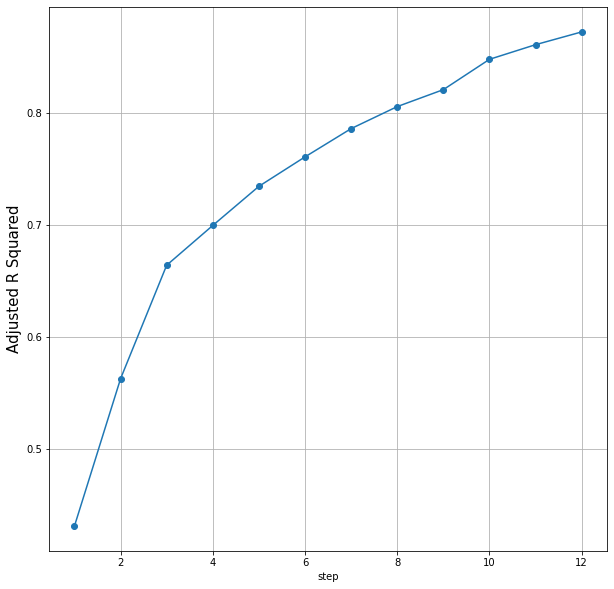

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
#plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.xlabel('step')
plt.grid(True)
plt.show()

In [ ]:
log_df = log_df[['population_log14', 'max_temp5', 'avg_temp9', 'max_temp2']]

In [ ]:
log_df = log_df[['avg_temp6',
 'max_temp3',
 'avg_relative_humidity2',
 'avg_relative_humidity4',
 'avg_relative_humidity1',
 'max_temp5',
 'avg_relative_humidity12',
 'population_log7',
 'population_log14',
 'max_wind_speed14']]

In [ ]:
import numpy as np
feature_columns = log_df.columns # Target column 빼기

X = log_df[feature_columns]
y = Y_data

In [ ]:
# train & 회귀 모델의 적합도 확인
full_model = sm.OLS(y,X)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          patient_count   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              42.96
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                    2.55e-17
Time:                        21:05:45   Log-Likelihood:                         -25.106
No. Observations:                  47   AIC:                                      70.21
Df Residuals:                      37   BIC:                                      88.71
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
avg_temp6                  -0.2239      0.035     -6.385      0.000      -0.295      -0.153
max_temp3                  -0.1137      0.026     -4.297      0.000      -0.167      -0.060
avg_relative_humidity2      0.0295      0.006      4.821      0.000       0.017       0.042
avg_relative_humidity4      0.0180      0.007      2.542      0.015       0.004       0.032
avg_relative_humidity1      0.0156      0.007      2.370      0.023       0.002       0.029
max_temp5                  -0.0732      0.026     -2.791      0.008      -0.126      -0.020
avg_relative_humidity12     0.0256      0.007      3.418      0.002       0.010       0.041
population_log7          4.204e-06   1.04e-06      4.043      0.000     2.1e-06    6.31e-06
population_log14        -3.867e-06      1e-06     -3.852      0.000    -5.9e-06   -1.83e-06
max_wind_speed14           -0.1344      0.049     -2.757      0.009      -0.233      -0.036
==============================================================================
Omnibus:                        3.149   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.559
Skew:                           0.571   Prob(JB):                        0.278
Kurtosis:                       3.031   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fitted_full_model.params

avg_temp6                 -0.223877
max_temp3                 -0.113652
avg_relative_humidity2     0.029508
avg_relative_humidity4     0.018019
avg_relative_humidity1     0.015600
max_temp5                 -0.073245
avg_relative_humidity12    0.025597
population_log7            0.000004
population_log14          -0.000004
max_wind_speed14          -0.134369
dtype: float64

# 정규성 검사

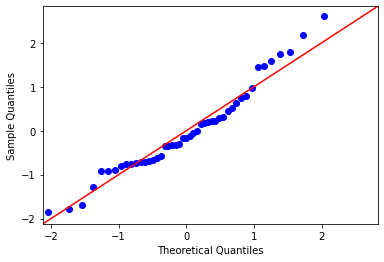

In [ ]:
res = fitted_full_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

In [ ]:
from scipy import stats
stats.shapiro(fitted_full_model.resid)

(0.9593421816825867, 0.10130960494279861)

# 잔차패턴 확인

Text(0, 0.5, 'Residual')

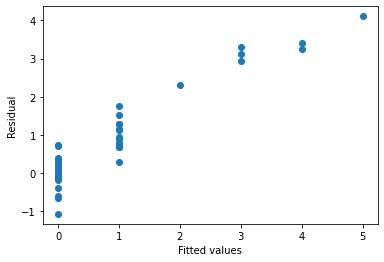

In [ ]:
pred_y = fitted_full_model.predict((X))

import matplotlib.pyplot as plt 
plt.scatter((y), (pred_y))
plt.xlabel('Fitted values')
plt.ylabel('Residual')